# Lab assignments

## Part One

In this part, you make use of the job survey data from the book: Quantitative data analysis with SPSS.

* ethnicgp = ethnic group, 1 = White, 2 = Asian, 3 = West Indian, 4 = African, 5 = other
* gender (male =1, female =2),
* income = gross annual income before tax in 1000£
* age in years
* years = number of years working at this firm
* commit = organisational commitment (scale 1 ~ 5)
* satis = job satisfaction
* autonom = job autonomy
* routine = job routine
* attend = attendance at meeting (yes = 1, no = 2)
* skill = rated skill (unskilled, semi-skilled, fairly skilled, highly skilled, 1 ~ 4)
* prody = rated productivity (very poor, poor, average, good, very good, 1 ~ 5)
* qual = rated quality (very poor, poor, average, good, very good, 1 ~ 5)
* absence = days of being absent in last 12 months

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

#import libraries and dataset and check if loaded correctly
from statstoolkit.statistics import *
from statstoolkit.probability import *
from statstoolkit.visualization import *
from statstoolkit.utils import *
import pandas as pd

df = pd.read_excel('Data_source.xlsx')
df.head()

,Id,ethnicgp,gender,age,years,commit,satis,autonom,routine,attend,skill,prody,qual,absence,income
0,1,1,1,29.0,1.0,4.0,NaN,10,9,2,3,NaN,1,7.0,16.6
1,2,2,1,26.0,5.0,2.0,NaN,7,15,1,3,4.0,4,8.0,14.6
2,3,3,1,40.0,5.0,4.0,15.0,7,8,1,4,3.0,4,0.0,17.8
3,4,3,1,46.0,15.0,2.0,7.0,7,10,2,3,3.0,4,4.0,16.4
4,5,2,2,63.0,36.0,4.0,14.0,11,18,1,3,5.0,3,0.0,18.6


### Exercise 1.1

#### a) Make plot of gender in Bar chart and ethnic group in pie diagram.

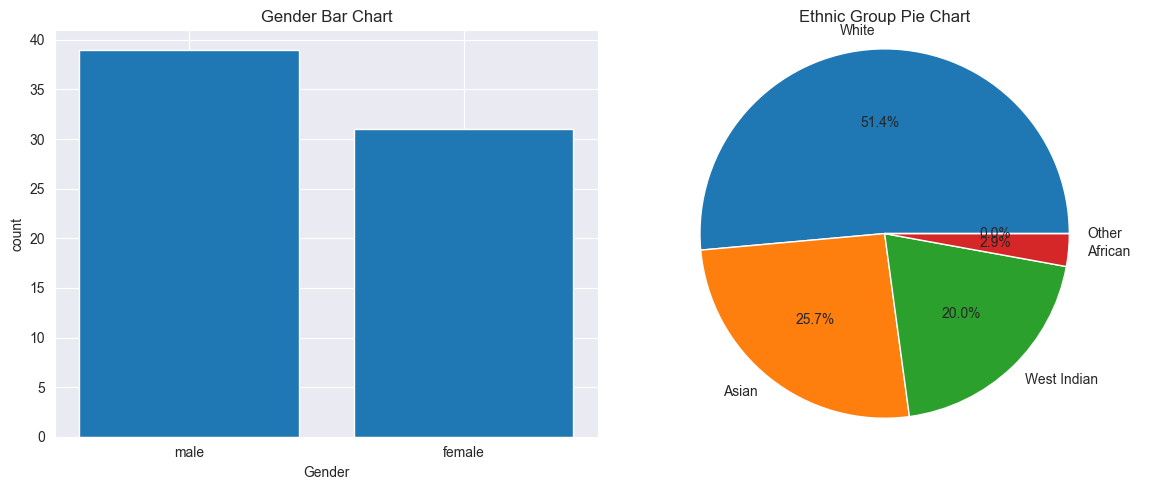

In [10]:
# Count the number of males and females in the gender feature
nr_males = np.count_nonzero(df['gender']==1)
nr_females = np.count_nonzero(df['gender']==2)

# Create figure with subplots
plt.figure(figsize=(12, 5))

# Plot the gender bar chart
plt.subplot(1, 2, 1)
plt.bar(['male','female'], [nr_males, nr_females])
plt.title("Gender Bar Chart")
plt.xlabel('Gender')
plt.ylabel('count')

# Count ethnic groups
etn_white = np.count_nonzero(df['ethnicgp']==1)
etn_asian = np.count_nonzero(df['ethnicgp']==2)
etn_indian = np.count_nonzero(df['ethnicgp']==3)
etn_african = np.count_nonzero(df['ethnicgp']==4)
etn_other = np.count_nonzero(df['ethnicgp']==5)

# Plot the ethnic group pie chart
plt.subplot(1, 2, 2)
plt.pie([etn_white,etn_asian,etn_indian,etn_african,etn_other],
        labels=['White','Asian','West Indian','African','Other'],
        autopct='%1.1f%%')
plt.title('Ethnic Group Pie Chart')
plt.axis('equal')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

#### b) Make a five number summary (max, min, median, the first and third quartiles) of Age then a box-plot

Age - Five number summary
Maximum:  63.0
Minimum:  18.0
Median:  39.0
First Quartile:  29.0
Third Quartile:  50.0


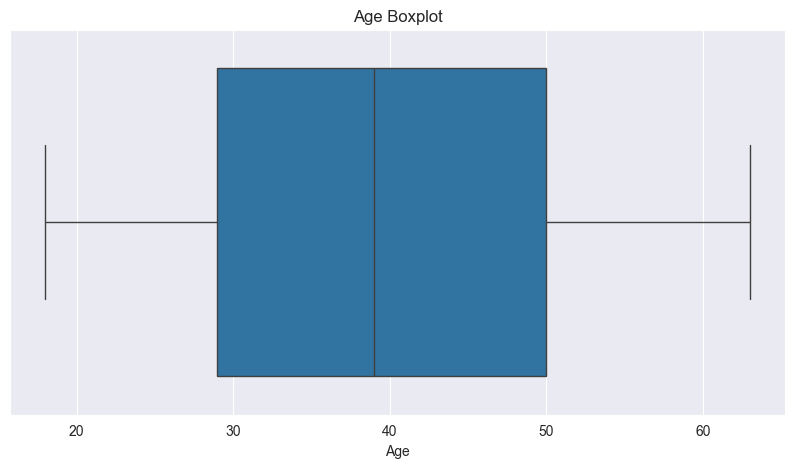

In [15]:
print('Age - Five number summary')
print('Maximum: ', df['age'].max())
print('Minimum: ', df['age'].min())
print('Median: ', df['age'].median())
print('First Quartile: ', df['age'].quantile(0.25))
print('Third Quartile: ', df['age'].quantile(0.75))

plt.figure(figsize=(10,5))
sns.boxplot(x=df['age'])
plt.title('Age Boxplot')
plt.xlabel('Age')
plt.show()

#### c) Find the mean and standard deviation of income, and as well as histogram of it.

Income Mean: 15.6382
Income Standard Deviation: 1.9812


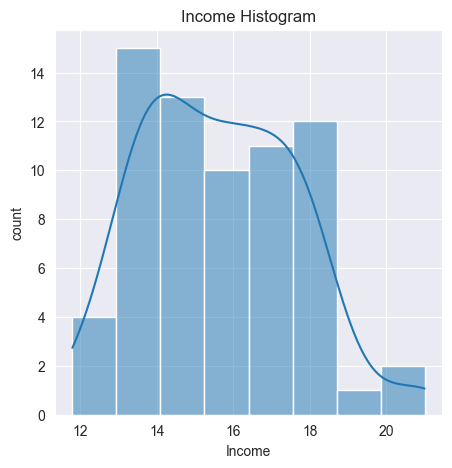

In [23]:
print(f"Income Mean: {np.mean(df['income']):.4f}")

print(f"Income Standard Deviation: {np.std(df['income']):.4f}")

plt.figure(figsize=(5,5))
sns.histplot(df['income'],kde=True)
plt.title('Income Histogram')
plt.xlabel('Income')
plt.ylabel('count')
plt.show()

### Exercise 1.2 Consider the variables income and absence.

#### a) Make scatter plot to visualize the relationship between them

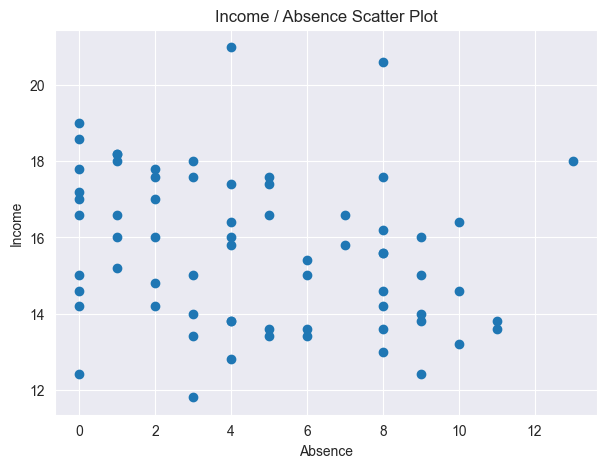

In [31]:
plt.figure(figsize=(7,5))
plt.scatter( y=df['income'],x=df['absence'])
plt.title('Income / Absence Scatter Plot')
plt.xlabel('Absence')
plt.ylabel('Income')
plt.show()

#### b) Find the simple regression model where income is dependent variable and absence is independent variable. What is your determination coefficient?

In [35]:
# For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression
# Metric for evaluation
from sklearn.metrics import r2_score

import statsmodels.api as sm
# Remove rows with missing values
df_clean = df[['absence', 'income']].dropna()
X = df_clean[['absence']]
y = df_clean['income']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X) # Running predictions

r2_score = r2_score(y, y_pred) # Computing R_squared

print(f"Determination coefficent: {r2_score:.4f}")

Determination coefficent: 0.0624


### Exercise 1.3 Study the multiple regression model with satis as dependent variable and commit, autonom, income, skill, rated quality, age, years as independent variables.

In [52]:
#Cleaning the data by droping missing values ethnicgp	gender	age	years	commit	satis	autonom	routine	attend	skill	prody	qual	absence	income
X = df_clean[['commit','autonom','income','skill','qual','age','years']].dropna()
y = df_clean['satis'].dropna()

# Adding a Constant term for the Intercept
X = sm.add_constant(X)

# Fitting model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  satis   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     32.72
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           3.00e-17
Time:                        16:33:27   Log-Likelihood:                -110.16
No. Observations:                  62   AIC:                             236.3
Df Residuals:                      54   BIC:                             253.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5545      1.776     -2.564      0.013      -8.115      -0.994
commit         0.9654      0.219      4.402      0.000       0.526       1.405
autonom        0.3953      0.090      4.391      0.000       0.215       0.576
income         0.4141      0.157      2.635      0.011       0.099       0.729
skill          0.6105      0.200      3.048      0.004       0.209       1.012
qual           0.2329      0.162      1.440      0.156      -0.091       0.557
age            0.0124      0.037      0.340      0.735      -0.061       0.086
years         -0.0147      0.033     -0.441      0.661      -0.082       0.052
==============================================================================
Omnibus:                        0.508   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.658
Skew:                          -0.149   Prob(JB):                        0.720
Kurtosis:                       2.593   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### a) Which variables among them do NOT have any significant impact on satis ?

In [57]:
print("P-values:")
print(model.pvalues)

P-values:
const      0.013147
commit     0.000051
autonom    0.000053
income     0.010946
skill      0.003559
qual       0.155518
age        0.735361
years      0.660962
dtype: float64


#### b) Find a simpler multiple regression model with satis as dependent variable by deleting all those non-impact variables.


In [58]:
#Cleaning the data by droping missing values
# ethnicgp	gender	age	years	commit	satis	autonom	routine	attend	skill	prody	qual	absence	income

X = df_clean[['commit','autonom','income','skill']].dropna()
y = df_clean['satis'].dropna()

# Adding a Constant term for the Intercept
X = sm.add_constant(X)

# Fitting model
model_2 = sm.OLS(y, X).fit()
print("P-values:\n", model_2.pvalues)
print(model_2.summary())

P-values:
 const      0.013215
commit     0.000018
autonom    0.000005
income     0.000281
skill      0.003689
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  satis   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     57.43
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           2.41e-19
Time:                        16:42:57   Log-Likelihood:                -111.44
No. Observations:                  62   AIC:                             232.9
Df Residuals:                      57   BIC:                             243.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

### Exercise 1.4 Find confidence interval of job satisfaction and also confidence interval of difference in job satisfaction between men and women.

In [61]:
import scipy.stats as stats
import math

d = df['satis'].dropna()
cl = 0.95 # confidence level

# confidence interval
ci_up, ci_low = stats.t.interval(cl, df=len(d)-1, loc=np.mean(d), scale=np.std(d, ddof=1) / np.sqrt(len(d)))
print(f"Confidence interval of job satisfaction: {ci_up:.4f}, {ci_low:.4f}")

Confidence interval of job satisfaction: 10.0386, 11.6379


In [62]:
cl = 0.95 # confidence level

#----------------MALE
df_male = df[df['gender'] == 1] # select rows that are male and drop empty values
df_satis_male = df_male['satis'].dropna()

# confidence interval for males
ci_male = stats.t.interval(cl, df=len(df_satis_male)-1, loc=np.mean(df_satis_male), scale=np.std(df_satis_male, ddof=1) / np.sqrt(len(df_satis_male)))
print('Confidence interval of job satisfaction for males: ', ci_male)

#----------------FEMALE
df_female = df[df['gender'] == 2] # select rows that are female and drop empty values
df_satis_female = df_female['satis'].dropna()

# confidence interval for females
ci_female = stats.t.interval(cl, df=len(df_satis_female)-1, loc=np.mean(df_satis_female), scale=np.std(df_satis_female, ddof=1) / np.sqrt(len(df_satis_female)))
print('Confidence interval of job satisfaction for females: ', ci_female)

SE = math.sqrt(((np.std(df_satis_male, ddof=1)/np.mean(df_satis_male))+(np.std(df_satis_female, ddof=1)/np.mean(df_satis_female))))
ci_up_difference = (np.mean(df_satis_male)-np.mean(df_satis_female)) + 1.96 * SE
ci_low_difference = (np.mean(df_satis_male)-np.mean(df_satis_female)) - 1.96 * SE
print(f"Confidence interval of difference between job satisfaction of males and females:  {ci_up_difference:.4f}, {ci_low_difference:.4f}")

#The resulting interval gives a range within which the true difference in average job satisfaction between men and women likely lies.
#If the interval contains zero, there is no statistically significant difference in job satisfaction between men and women at the chosen confidence level.


Confidence interval of job satisfaction for males:  (np.float64(9.837489807773762), np.float64(12.054402084118129))
Confidence interval of job satisfaction for females:  (np.float64(9.488737526765531), np.float64(11.930617311944145))
Confidence interval of difference between job satisfaction of males and females:  1.7727, -1.3002


### Exercise 1.5 Using the Mann-Whitney-Wilcoxon test to see if there is any significance in skill between man and woman, and compare the result with confidence interval for the difference.

In [64]:
import scipy.stats as stats

#clean only the data that you are gonna use for the exercise

df_skill_male = df_male['skill'].dropna()
df_skill_female = df_female['skill'].dropna()

u_statistic, pVal = stats.mannwhitneyu(df_skill_male,df_skill_female)

print(u_statistic, pVal)

if pVal > 0.05:
    print(f"We fail to reject the null hypothesis that sample distributions are equal since p-value is: {pVal:.4f}")
else:
    print(f"We reject the null hypothesis that sample distributions are equal since p-value is: {pVal:.4f}")

733.0 0.11732778354741767
We fail to reject the null hypothesis that sample distributions are equal since p-value is: 0.1173


In [65]:
cl = 0.95 # confidence level

#----------------MALE
# confidence interval for males
ci_male_up, ci_male_low = stats.t.interval(cl, df=len(df_skill_male)-1, loc=np.mean(df_skill_male), scale=np.std(df_skill_male, ddof=1) / np.sqrt(len(df_skill_male)))
print('Confidence interval of job satisfaction for males: ', ci_male_up, ci_male_low)

#----------------FEMALE
# confidence interval for females
ci_female_up, ci_female_low = stats.t.interval(cl, df=len(df_skill_female)-1, loc=np.mean(df_skill_female), scale=np.std(df_skill_female, ddof=1) / np.sqrt(len(df_skill_female)))
print('Confidence interval of job satisfaction for females: ', ci_female_up, ci_female_low)

SE = math.sqrt(((np.std(df_skill_male, ddof=1)/np.mean(df_skill_male))+(np.std(df_skill_female, ddof=1)/np.mean(df_skill_female))))
ci_up_difference = (np.mean(df_skill_male)-np.mean(df_skill_female)) + 1.96 * SE
ci_down_difference = (np.mean(df_skill_male)-np.mean(df_skill_female)) - 1.96 * SE
print(f"Confidence interval of difference between job satisfaction of males and females: {ci_up_difference:.4f}, {ci_down_difference:.4f}")

#The resulting interval gives a range within which the true difference in average job satisfaction between men and women likely lies.
#If the interval contains zero, there is no statistically significant difference in job skill between men and women at the chosen confidence level.


Confidence interval of job satisfaction for males:  2.4328314449311885 3.10563009353035
Confidence interval of job satisfaction for females:  1.9580988762620457 2.7515785430927933
Confidence interval of difference between job satisfaction of males and females: 2.2044, -1.3756


### Exercise 1.6 Using the Kruskal-Wallis test to see if there is any significance in absence among ethnic group, and compare the result with One-Way ANOVA analysis.

In [68]:
# ethnicgp = ethnic group, 1 = White, 2 = Asian, 3 = West Indian, 4 = African, 5 = other

 # select absence rows from each ethnic group and drop empty values
df_white = df[df['ethnicgp'] == 1]
df_white_abs = df_white['absence'].dropna()

df_asian = df[df['ethnicgp'] == 2]
df_asian_abs = df_asian['absence'].dropna()

df_indian = df[df['ethnicgp'] == 3]
df_indian_abs = df_indian['absence'].dropna()

df_african = df[df['ethnicgp'] == 4]
df_african_abs = df_african['absence'].dropna()

df_other = df[df['ethnicgp'] == 5]
df_other_abs = df_other['absence'].dropna()
print("Total number of other ethnicities elements:", len(df_other_abs))
#Empy array on absence of 'other' ethnic group

kruskal_statistic, kruskal_pVal = stats.kruskal(df_white_abs, df_asian_abs, df_indian_abs, df_african_abs) #don't include other ethnicities since there is no data in that group

print(f"Kruskal P-Value test: {kruskal_pVal:.4f}")
if kruskal_pVal > 0.05:
    print(f"Since the p-value for kruskal test is {kruskal_pVal:.4f} we cannot reject the null hypothesis that the median absence is the same for all ethnic groups.")
else:
    print(f"Since the p-value for kruskal test is {kruskal_pVal:.4f}, we reject the null hypothesis that the median absence is the same for all ethnic groups.")

anova_statistic, anova_pVal = stats.f_oneway(df_white_abs, df_asian_abs, df_indian_abs, df_african_abs)

print(f"ANOVA P-Value test: {anova_pVal:.4f}")

if anova_pVal > 0.05:
    print(f"Since the p-value for one way anova test is {anova_pVal:.4f}, we cannot reject the null hypothesis that the means of all the ethnic groups are equal.")
else:
    print(f"Since the p-value for one way anova test is {anova_pVal:.4f}, we reject the null hypothesis that the means of all the ethnic groups are equal.")



Total number of other ethnicities elements: 0
Kruskal P-Value test: 0.3324
Since the p-value for kruskal test is 0.3324 we cannot reject the null hypothesis that the median absence is the same for all ethnic groups.
ANOVA P-Value test: 0.3357
Since the p-value for one way anova test is 0.3357, we cannot reject the null hypothesis that the means of all the ethnic groups are equal.


### Exercise 1.7 Re-code the variable “income” into “income_class “ with proper choice of limits of class classification (suggestion: low income class [Min, Q1], middle income class (Q1, Q3], high income class (Q3, Max]) thereafter investigate if there is any significant relationship between income_class and skill.

In [16]:

min = df['income'].min()
q1 = df['income'].quantile(0.25)
q3 = df['income'].quantile(0.75)
max = df['income'].max()

print(min, q1, q3, max)

df['income_class'] = pd.cut(x=df['income'], bins=[min, q1, q3, max], labels=['low income', 'middle income', 'high income'])

print(df)

11.8 13.95 17.25 21.0
    Id  ethnicgp  gender   age  years  commit  satis  autonom  routine  \
0    1         1       1  29.0    1.0     4.0    NaN       10        9   
1    2         2       1  26.0    5.0     2.0    NaN        7       15   
2    3         3       1  40.0    5.0     4.0   15.0        7        8   
3    4         3       1  46.0   15.0     2.0    7.0        7       10   
4    5         2       2  63.0   36.0     4.0   14.0       11       18   
..  ..       ...     ...   ...    ...     ...    ...      ...      ...   
65  66         4       2  30.0    8.0     NaN   10.0        9       17   
66  67         1       1  29.0    8.0     3.0   12.0        8       15   
67  68         3       1  45.0    9.0     2.0   10.0       12       13   
68  69         3       1  53.0   30.0     3.0   10.0        7       16   
69  70         1       1  47.0   22.0     2.0    8.0       11       16   

    attend  skill  prody  qual  absence  income   income_class  
0        2      3    NaN

Kruskal P-Value test: 0.021184073095215333
Since the p-value for kruskal test is less than 0.05, we reject the null hypothesis that the means of all the income classes groups are equal.
Axes(0.125,0.11;0.775x0.77)


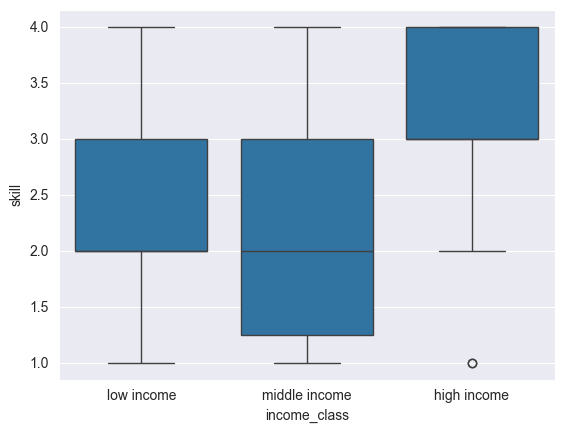

In [20]:
df_low_income = df[df['income_class'] == 'low income']
df_low_income_skill = df_low_income['skill'].dropna()

df_mid_income = df[df['income_class'] == 'middle income']
df_mid_income_skill = df_mid_income['skill'].dropna()

df_high_income = df[df['income_class'] == 'high income']
df_high_income_skill = df_high_income['skill'].dropna()

kruskal_statistic, kruskal_pVal = stats.kruskal(df_low_income_skill, df_mid_income_skill, df_high_income_skill)

print("Kruskal P-Value test:", kruskal_pVal)

if kruskal_pVal > 0.05:
    print("Since the p-value for kruskal test is not less than 0.05, we cannot reject the null hypothesis that the means of all the income clases groups are equal.")
else:
    print("Since the p-value for kruskal test is less than 0.05, we reject the null hypothesis that the means of all the income classes groups are equal.")

df_skill_clean = df[['skill','income_class']].dropna()

print(sns.boxplot(df_skill_clean,x='income_class',y='skill'))